# IA pour débutant : Dataset pingouin.

Dans le cadre d'une formation, j'ai besoin de faire une application web.</br>
Ce notebook va me permettre de créer une IA ainsi que des images pour illustrer la création d'une IA.
Le but de ce site seras de présenté une IA, mais dans un esprit de vulgarisation.

Les IA font partie de la grande famille de la science des données.
Sans données, pas d'IA

Nous allons donc exploiter un jeu de données penguin.

Pour créer notre IA il y a 2/3 grandes étapes:

<ul>
<li>Analyse/nettoyage des données</li>
<li>Entrainement et et création d'une IA</li>
</ul>

### Import des bibliothèques et fonction

In [1]:
#Bibliotheque de dataframe "objets tableau"
import pandas as pd

#import un "moyenneur standard"
from sklearn.preprocessing import StandardScaler

#import des bibliotheques graphiques (courbe nuage de point histogramme ...)
import matplotlib.pyplot as plt
import seaborn as sns

#numpy est une bibliotheque de "tableaux rapide" 
import numpy as np

#import des modèles d'IA
from fonctions import perso_classement

#remplace ma fonction dico vers binaire
from sklearn.preprocessing import LabelEncoder

#fonction de sauvagarde IA
import joblib

In [2]:
#options générales pour les graphes
sns.set_theme(style='dark')

In [3]:
#chemin pour l envoie des fichiers
chemin_img = 'pingouin_app/static/img/description_ia_pingouin/'
chemin_IA = 'pingouin_app/static/model_IA/'
chemin_label = 'pingouin_app/static/model_IA/label/'

### Import du dataset (inclus dans seaborn) 

In [4]:
data=sns.load_dataset('penguins')

<a id=analyse></a>
### Analyse du dataset
Le dataset est un tableau avec des valeurs.<br> Nous avons donc l'espèce, l'île, et duatre caractéritisque sur le nez, les nageoires, le poids ainsi que le sexe.

In [5]:
display(data.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
data[data['bill_depth_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [8]:
data[data['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### On ne connait pas le sexe de certains pingouins.
On va justement faire une IA pour déterminer le sexe de ces pingouins.
<br>
Mais on a aussi des manquements sur d'autres colonnes.<br>
Je supprime les 2 pingouins oú l'on ne connais que l'espèce et l'île.<br>

In [9]:
# liste des pingouins de sexe inconnus.
data_sexe_inconnu = data[data['sex'].isna()]
#enlevé les pingouins sans données
data_sexe_inconnu = data_sexe_inconnu[~data_sexe_inconnu['bill_depth_mm'].isna()]
display(data_sexe_inconnu)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [10]:
#je sors les na du dataset
data = data.dropna()

In [11]:
data.shape

(333, 7)

Aprés une analyse très rapide nous avons donc 333 pingouins avec 7 colonnes pour l'entrainement de l 'IA

### Analyse graphique du dataset 

In [12]:
#je crée un label encoder pour chaque colonne
Le_sex = LabelEncoder()
data['sex'] = Le_sex.fit_transform(data['sex'])
joblib.dump(Le_sex, open(chemin_label + 'label_sex.pkl', "wb"))
Le_island = LabelEncoder()
data['island'] = Le_island.fit_transform(data['island'])
joblib.dump(Le_island, open(chemin_label + 'label_island.pkl', "wb"))
Le_species = LabelEncoder()
data['species'] = Le_species.fit_transform(data['species'])
joblib.dump(Le_species, open(chemin_label + 'label_species.pkl', "wb"))

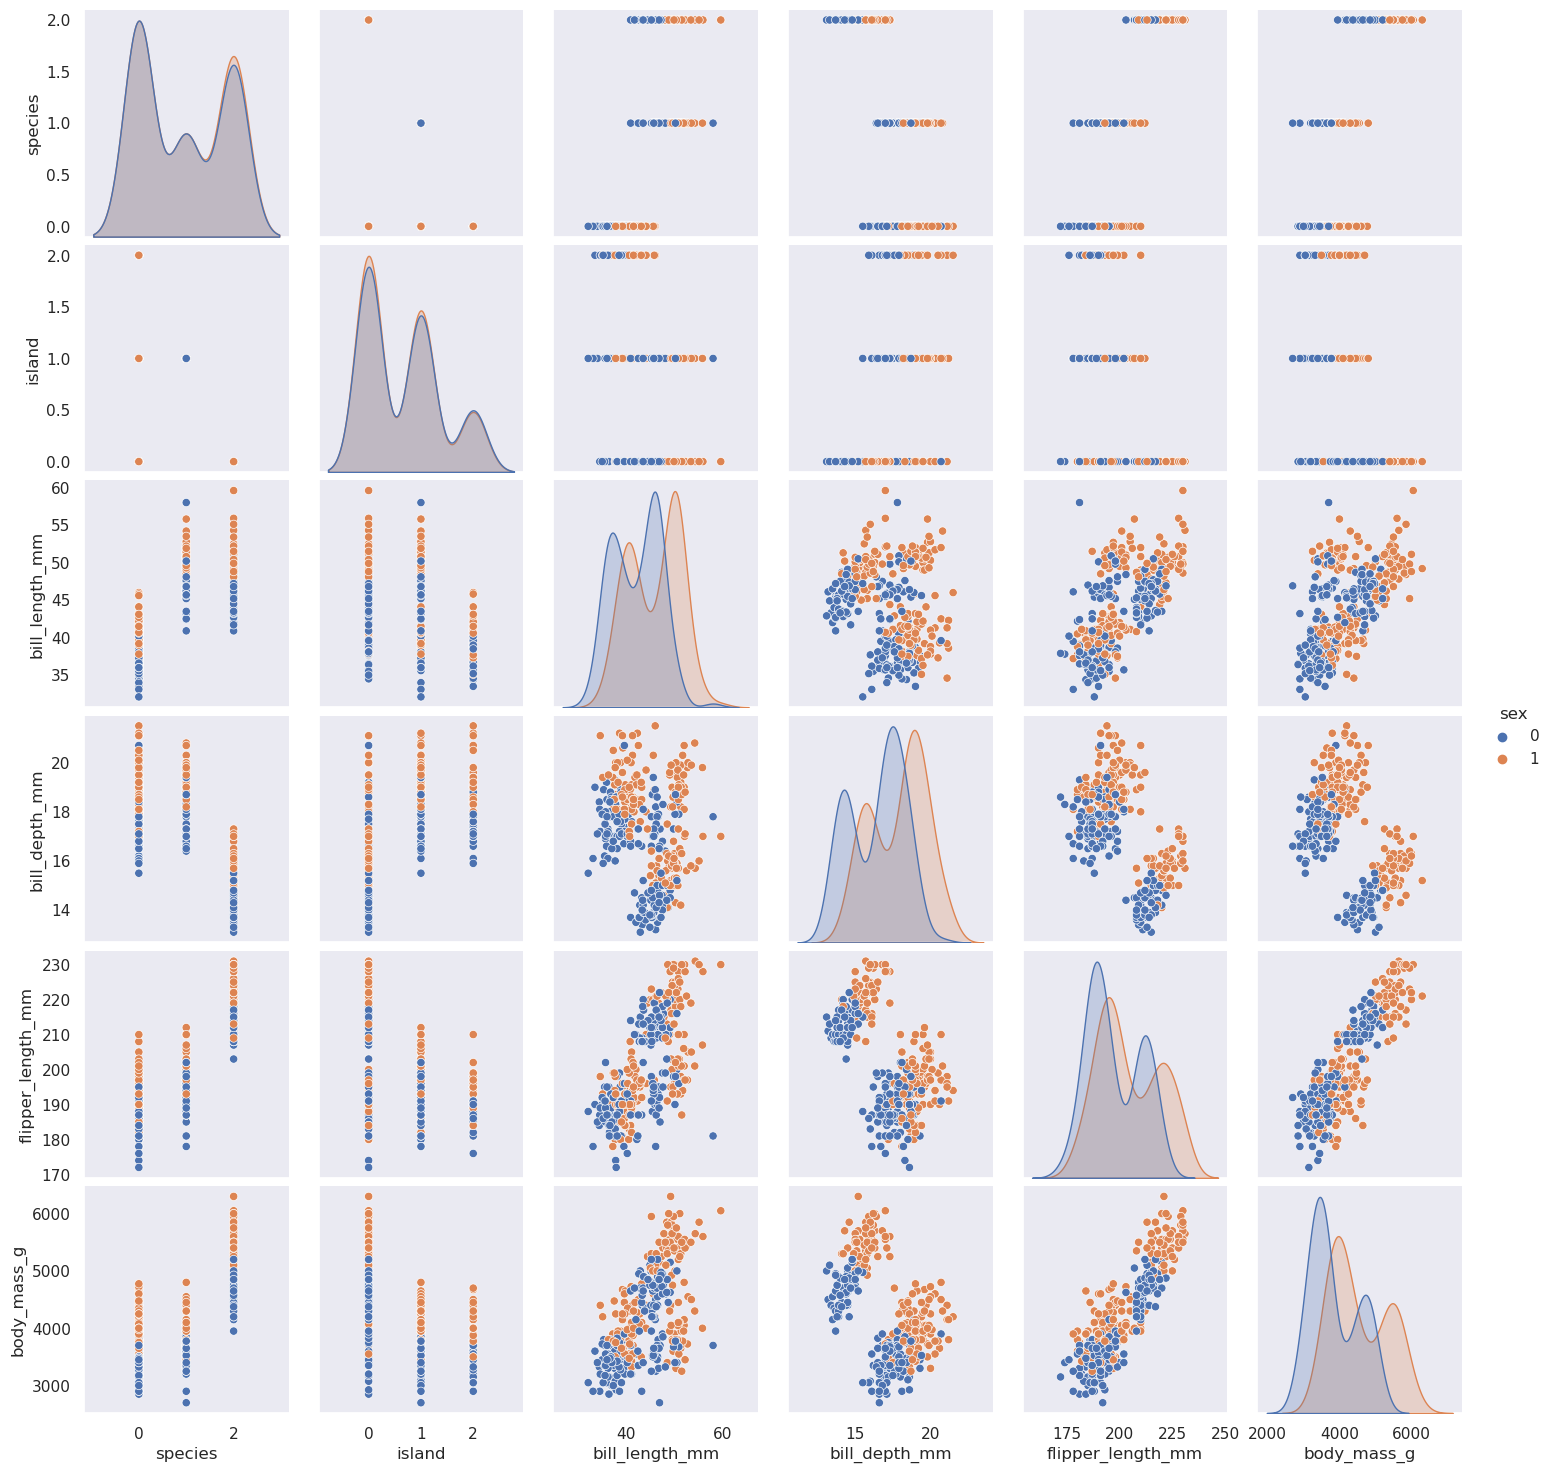

In [13]:
ax = sns.pairplot(data,hue='sex')
plt.savefig(chemin_img+"pairplot.jpg")
plt.show()

Les pingouins Adelie sont sur toutes les îles. Les Chinstrap uniquement sur Dream et les Gentoo uniquement sur l'île de Biscoe.
## Conclusion analyse
Il n'y a pas de méthodes sûre pour detecté le sexe on va essayer des méthodes d'IA et les tester.

Bon il n'y a pas de dimension qui indique clairement une séparation des sexes.

In [14]:
#faire standartscaler
scaler = StandardScaler()
data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] = (scaler.fit_transform(data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]))
#sauvegarde_model
joblib.dump(scaler, open(chemin_label + 'scaler.pkl','wb'))

In [15]:
data.drop(columns='island',inplace=True)

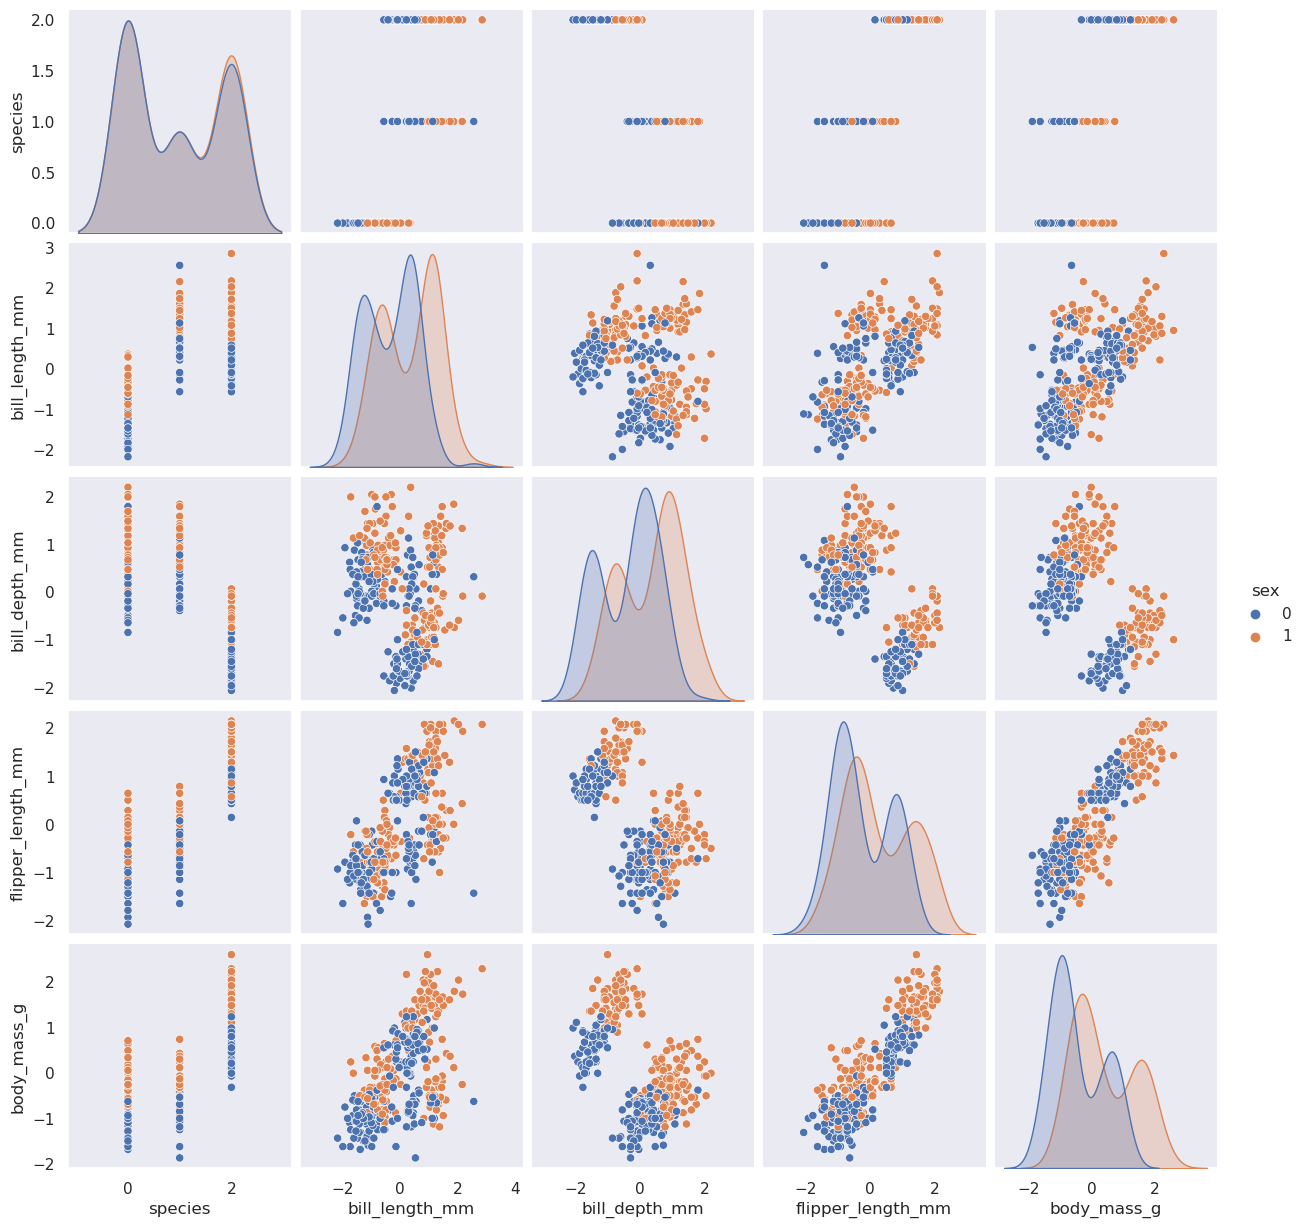

In [16]:
ax = sns.pairplot(data,hue='sex')
plt.savefig(chemin_img+"pairplot_scaler.jpg")
plt.show()

Normaliser les données permets très souvent d'améliorrer les résultats des IA. Cela permets aussi avec certain modeles de diminuer les ressources materielles (temps CPU/mémoire) pour faire les entrainements.


# Entrainement et comparaison des IA

In [17]:
#separation en train test
train,train_target,test,test_target =perso_classement.separation_data_train_test_target(data,'sex')

rapport sur données d'entrainement :


              precision    recall  f1-score   support

           0       0.48      0.37      0.42       122
           1       0.50      0.61      0.55       127

    accuracy                           0.49       249
   macro avg       0.49      0.49      0.48       249
weighted avg       0.49      0.49      0.49       249



rapport sur données de test:


              precision    recall  f1-score   support

           0       0.52      0.30      0.38        43
           1       0.49      0.71      0.58        41

    accuracy                           0.50        84
   macro avg       0.51      0.50      0.48        84
weighted avg       0.51      0.50      0.48        84



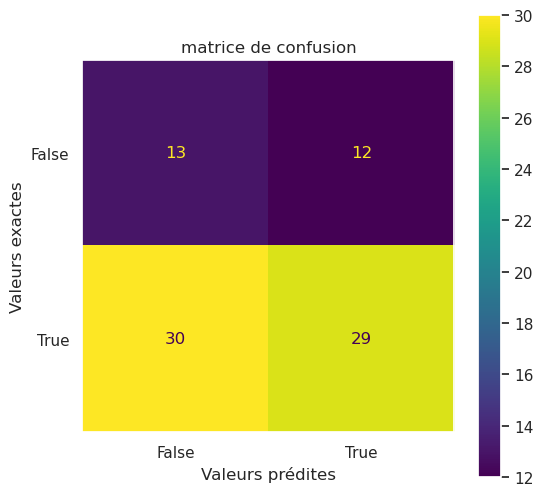

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
kmeans_pingouin,ax = perso_classement.kmeans_bool(train,train_target,test,test_target,ax)
plt.savefig(chemin_img+'matrice_kmeans.jpg')

#sauvegarde_model
joblib.dump(kmeans_pingouin, open(chemin_IA + 'kmeans_pingouin.pkl', "wb"))

Le nombre de voisins choisi automatiquement est de : 8
rapport sur données d'entrainement :


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       122
           1       0.96      0.91      0.94       127

    accuracy                           0.94       249
   macro avg       0.94      0.94      0.94       249
weighted avg       0.94      0.94      0.94       249



rapport sur données de test:


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.88      0.94        41

    accuracy                           0.94        84
   macro avg       0.95      0.94      0.94        84
weighted avg       0.95      0.94      0.94        84



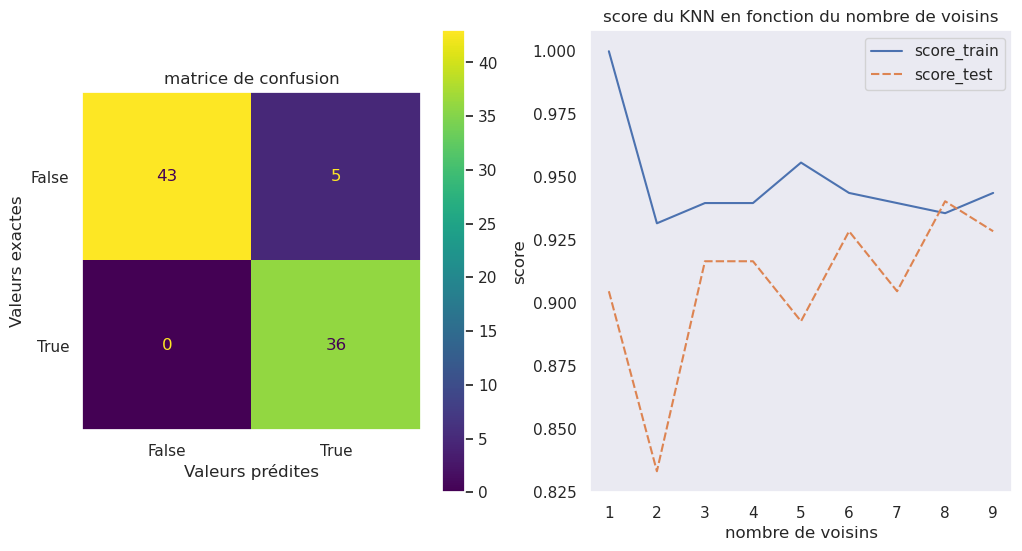

In [19]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
KNN_pengouin = perso_classement.KNNtest(train,train_target,test,test_target,ax[0],ax[1])
plt.savefig(chemin_img+'matrice_knn.jpg')

#sauvegarde_model
joblib.dump(KNN_pengouin, open(chemin_IA + 'knn_pingouin.pkl','wb'))

rapport sur données d'entrainement :


              precision    recall  f1-score   support

           0       0.71      0.75      0.73       122
           1       0.74      0.71      0.73       127

    accuracy                           0.73       249
   macro avg       0.73      0.73      0.73       249
weighted avg       0.73      0.73      0.73       249



rapport sur données de test:


              precision    recall  f1-score   support

           0       0.67      0.81      0.74        43
           1       0.75      0.59      0.66        41

    accuracy                           0.70        84
   macro avg       0.71      0.70      0.70        84
weighted avg       0.71      0.70      0.70        84



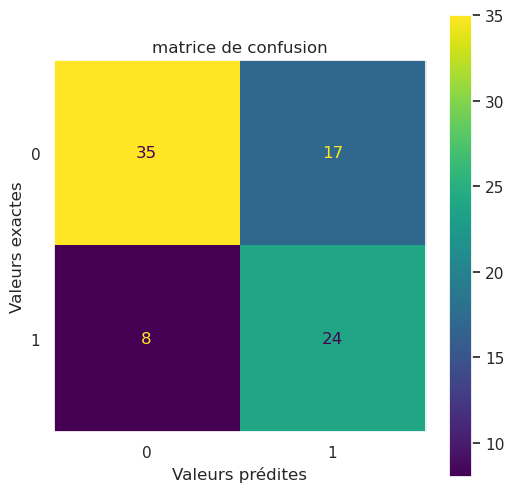

In [20]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
gnb_pingouin,ax = perso_classement.naive_bayes_gaussian(train,train_target,test,test_target,ax)
plt.savefig(chemin_img+'matrice_gnb.jpg')

#sauvegarde_model
joblib.dump(gnb_pingouin, open(chemin_IA + 'gnb_pingouin.pkl', "wb"))

rapport sur données d'entrainement :


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       122
           1       0.92      0.92      0.92       127

    accuracy                           0.92       249
   macro avg       0.92      0.92      0.92       249
weighted avg       0.92      0.92      0.92       249



rapport sur données de test:


              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.90      0.88      0.89        41

    accuracy                           0.89        84
   macro avg       0.89      0.89      0.89        84
weighted avg       0.89      0.89      0.89        84



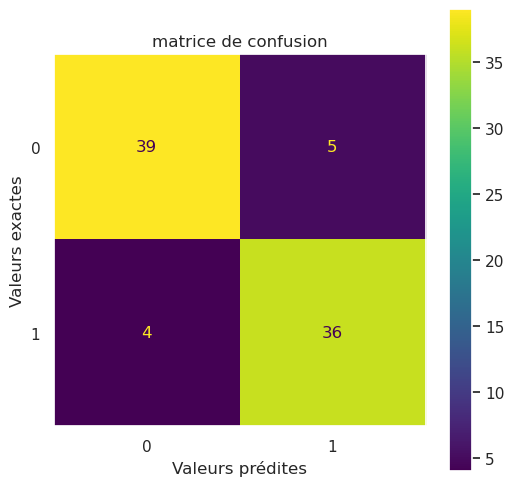

In [21]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
reg_log_pingouin,ax = perso_classement.regression_logistique(train,train_target,test,test_target,ax,max_iter=1000)
plt.savefig(chemin_img+'matrice_reg_log.jpg')

#sauvegarde_model
joblib.dump(reg_log_pingouin, open(chemin_IA + 'reg_log_pingouin.pkl','wb'))

rapport sur données d'entrainement :


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       122
           1       0.92      0.95      0.93       127

    accuracy                           0.93       249
   macro avg       0.93      0.93      0.93       249
weighted avg       0.93      0.93      0.93       249



rapport sur données de test:


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.93      0.93      0.93        41

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



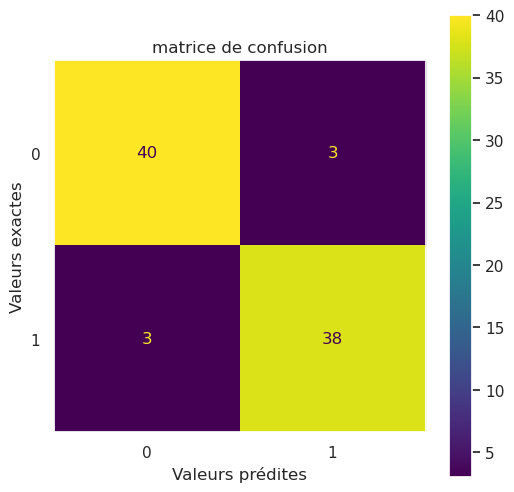

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
svm_pingouin,ax = perso_classement.SVM(train,train_target,test,test_target,ax)
plt.savefig(chemin_img+'SVM.jpg')

#sauvegarde_model
joblib.dump(svm_pingouin, open(chemin_IA + 'svm_pingouin.pkl','wb'))